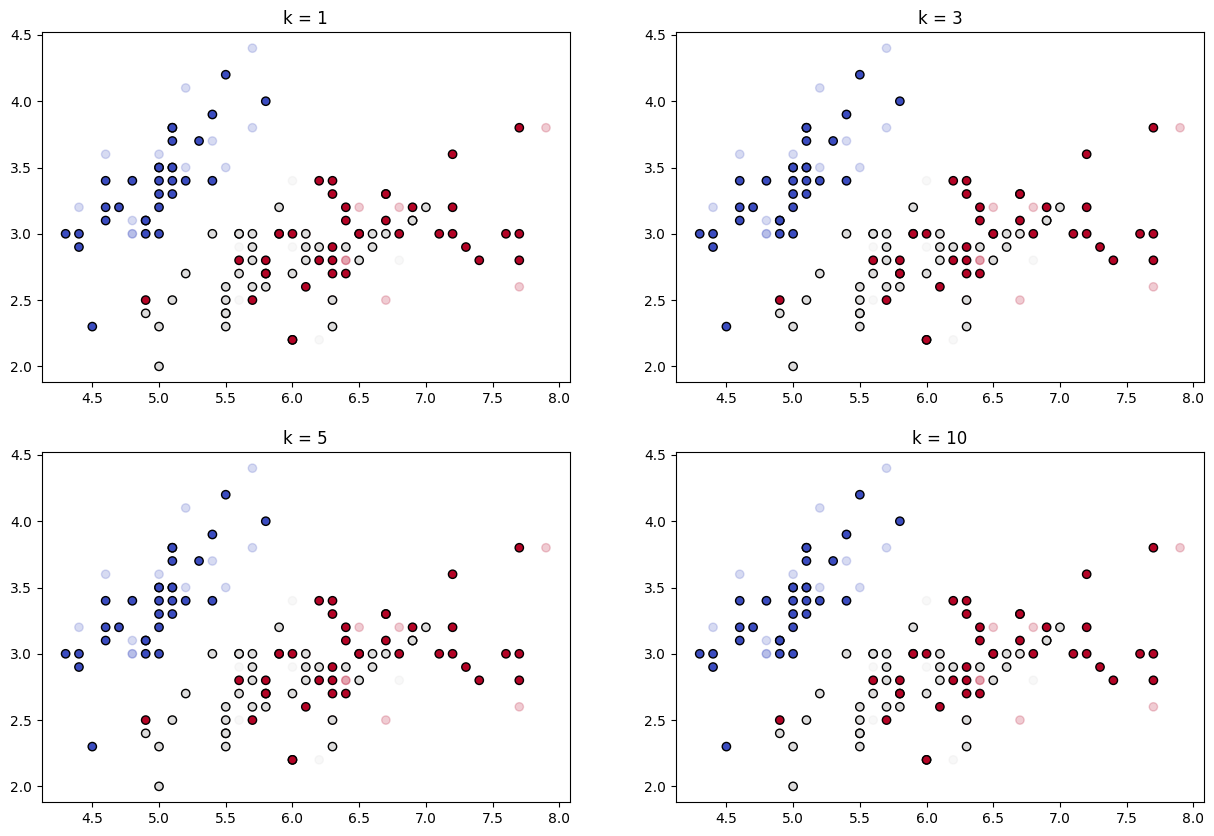

Confusion Matrix:
 [[11  0  0]
 [ 0  9  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.82      0.90        11
           2       0.83      1.00      0.91        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.95      0.94      0.94        32

Best k value (RandomSearchCV): 1


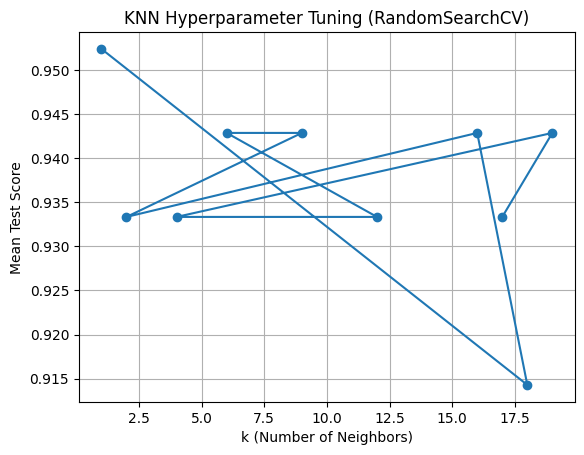

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Dataset
def load_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    data = pd.read_csv(url, header=None, names=columns)
    data['class'] = data['class'].astype('category').cat.codes  # Encode class labels
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values
    return X, y

# Task A4: Generate Test Data
def generate_test_data():
    X_test = np.mgrid[0:10:0.1, 0:10:0.1].reshape(2, -1).T
    return X_test

# Task A4: kNN Classification and Visualization
def knn_classification(X_train, y_train, X_test, k=3):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Task A5: Repeat with different k values
def visualize_boundary(X_train, y_train, X_test):
    plt.figure(figsize=(15, 10))
    for i, k in enumerate([1, 3, 5, 10], 1):
        plt.subplot(2, 2, i)
        y_pred = knn_classification(X_train, y_train, X_test, k)
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.2)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
        plt.title(f'k = {k}')
    plt.show()

# Task A6: Project Data Classification (Sample Data Generation)
def project_data_classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Task A7: Hyper-parameter Tuning using RandomizedSearchCV
def hyperparameter_tuning(X_train, y_train):
    param_dist = {'n_neighbors': np.arange(1, 21)}
    random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
    random_search.fit(X_train, y_train)
    best_k = random_search.best_params_['n_neighbors']
    print(f"Best k value (RandomSearchCV): {best_k}")

    # Visualizing the performance with different k values
    results = random_search.cv_results_
    plt.plot(results['param_n_neighbors'], results['mean_test_score'], marker='o')
    plt.title('KNN Hyperparameter Tuning (RandomSearchCV)')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Mean Test Score')
    plt.grid(True)
    plt.show()

# Main Program Execution
if __name__ == "__main__":
    X, y = load_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    visualize_boundary(X_train, y_train, X_test)
    project_data_classification(X_train, y_train)
    hyperparameter_tuning(X_train, y_train)
